In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [982]:
df = pd.read_excel('Dentistry Dataset.xlsx')

In [983]:
df

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,NaN,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,1097,NaN,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,1098,NaN,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,1099,NaN,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [985]:
# Get the list of column names
column_names = df.columns.tolist()

# Print the list of column names
print(f'Column names: {column_names}')


Column names: ['Sl No', 'Sample ID', 'Age', 'Gender', 'inter canine distance intraoral', 'intercanine distance casts', 'right canine width intraoral', 'right canine width casts', 'left canine width intraoral', 'left canine width casts', 'right canine index intra oral', 'right canine index casts', 'left canine index intraoral', 'left canine index casts']


In [986]:
# Check for missing values in each column
missing_values = df.isna().sum()

# Print the number of missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64


In [987]:
# Drop the 'Sample ID' column
df = df.drop(columns=['Sample ID'])

# Verify that the column has been dropped
print("Columns after dropping 'Sample ID':")
print(df.columns)


Columns after dropping 'Sample ID':
Index(['Sl No', 'Age', 'Gender', 'inter canine distance intraoral',
       'intercanine distance casts', 'right canine width intraoral',
       'right canine width casts', 'left canine width intraoral',
       'left canine width casts', 'right canine index intra oral',
       'right canine index casts', 'left canine index intraoral',
       'left canine index casts'],
      dtype='object')


In [988]:
df = df.drop(columns=['Sl No'])

In [989]:
# Get descriptive statistics for the dataset
description = df.describe()

# Display the descriptive statistics
description


,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,21.625455,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,2.085892,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,18.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,20.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,22.000000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,23.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,25.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


In [990]:
# Initialize the LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply label encoding to the 'Gender' column
df['Gender'] = le.fit_transform(df['Gender'])

# Display the first few rows to verify the changes
print(df.head())


   Age  Gender  inter canine distance intraoral  intercanine distance casts  \
0   24       0                            25.06                       25.05   
1   22       0                            25.78                       25.79   
2   23       0                            23.83                       23.83   
3   20       0                            26.12                       26.12   
4   20       0                            26.36                       26.41   

   right canine width intraoral  right canine width casts  \
0                          6.08                      6.08   
1                          6.13                      6.13   
2                          5.91                      5.96   
3                          6.08                      6.08   
4                          6.09                      6.09   

   left canine width intraoral  left canine width casts  \
0                         6.09                     6.10   
1                         6.33          

In [991]:
# Determine the type of each column
column_types = df.dtypes

# Print the types of each column
print("Column Types:")
print(column_types)

Column Types:
Age                                  int64
Gender                               int32
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
dtype: object


In [992]:
# Determine the type of each column
column_types = df.dtypes

# Separate categorical and continuous columns
categorical_columns = [col for col in column_types.index if column_types[col] == 'int32' or column_types[col] == 'object']
continuous_columns = [col for col in column_types.index if column_types[col] == 'float64' or column_types[col] == 'int64']

# Print the columns by type
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
['Gender']


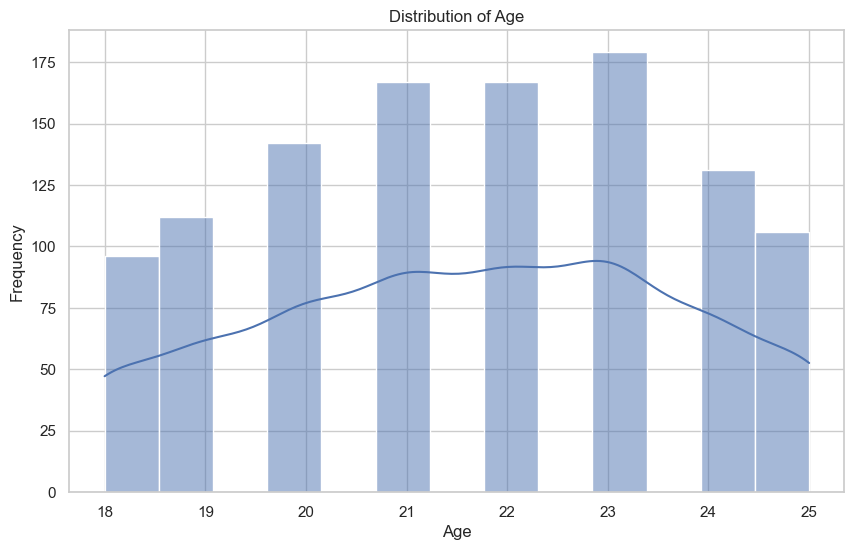

In [993]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Age column distribution

As we can see from the above , Age feature distribution, the data consists of age group between 18-25. Which means my following features range values should be as follows :

Inter Canine Distance Intraoral: 25-35 mm

The distance between the canines in the mouth.
Intercanine Distance Casts: 25-35 mm

Similar to the intraoral measurement, but taken from a dental cast.
Right Canine Width Intraoral: 6-8 mm

The width of the right canine tooth measured in the mouth.
Right Canine Width Casts: 6-8 mm

The width of the right canine tooth measured from a dental cast.
Left Canine Width Intraoral: 6-8 mm

The width of the left canine tooth measured in the mouth.
Left Canine Width Casts: 6-8 mm

The width of the left canine tooth measured from a dental cast.

# Let us now check, the range of values for the above mentioned features

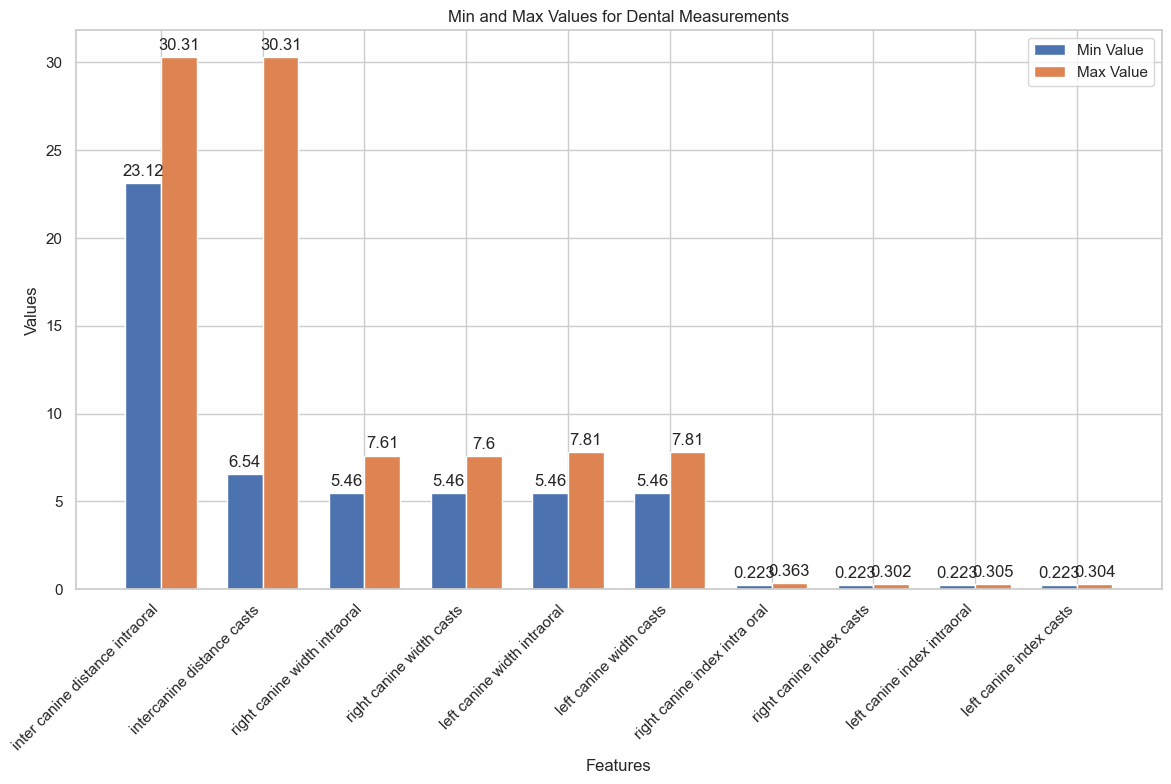

In [994]:
import pandas as pd
import matplotlib.pyplot as plt


# List of features to analyze
features = [
    'inter canine distance intraoral',
    'intercanine distance casts',
    'right canine width intraoral',
    'right canine width casts',
    'left canine width intraoral',
    'left canine width casts',
    'right canine index intra oral',
    'right canine index casts',
    'left canine index intraoral',
    'left canine index casts'
]

# Compute min and max values
min_values = [df[feature].min() for feature in features]
max_values = [df[feature].max() for feature in features]

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = range(len(features))

bars1 = ax.bar(index, min_values, bar_width, label='Min Value')
bars2 = ax.bar([i + bar_width for i in index], max_values, bar_width, label='Max Value')

# Add labels, title, and legend
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Min and Max Values for Dental Measurements')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(features, rotation=45, ha='right')
ax.legend()

# Add value labels on the bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()



#  Interpretation of above Bar chart 
As we can observe from the above bar chart of Intercanine Distance Casts, the min value is 6.54mm but the actual min value for the  Intercanine Distance Casts should be 25mm.So with this i can say that i have outliers in my dataset.

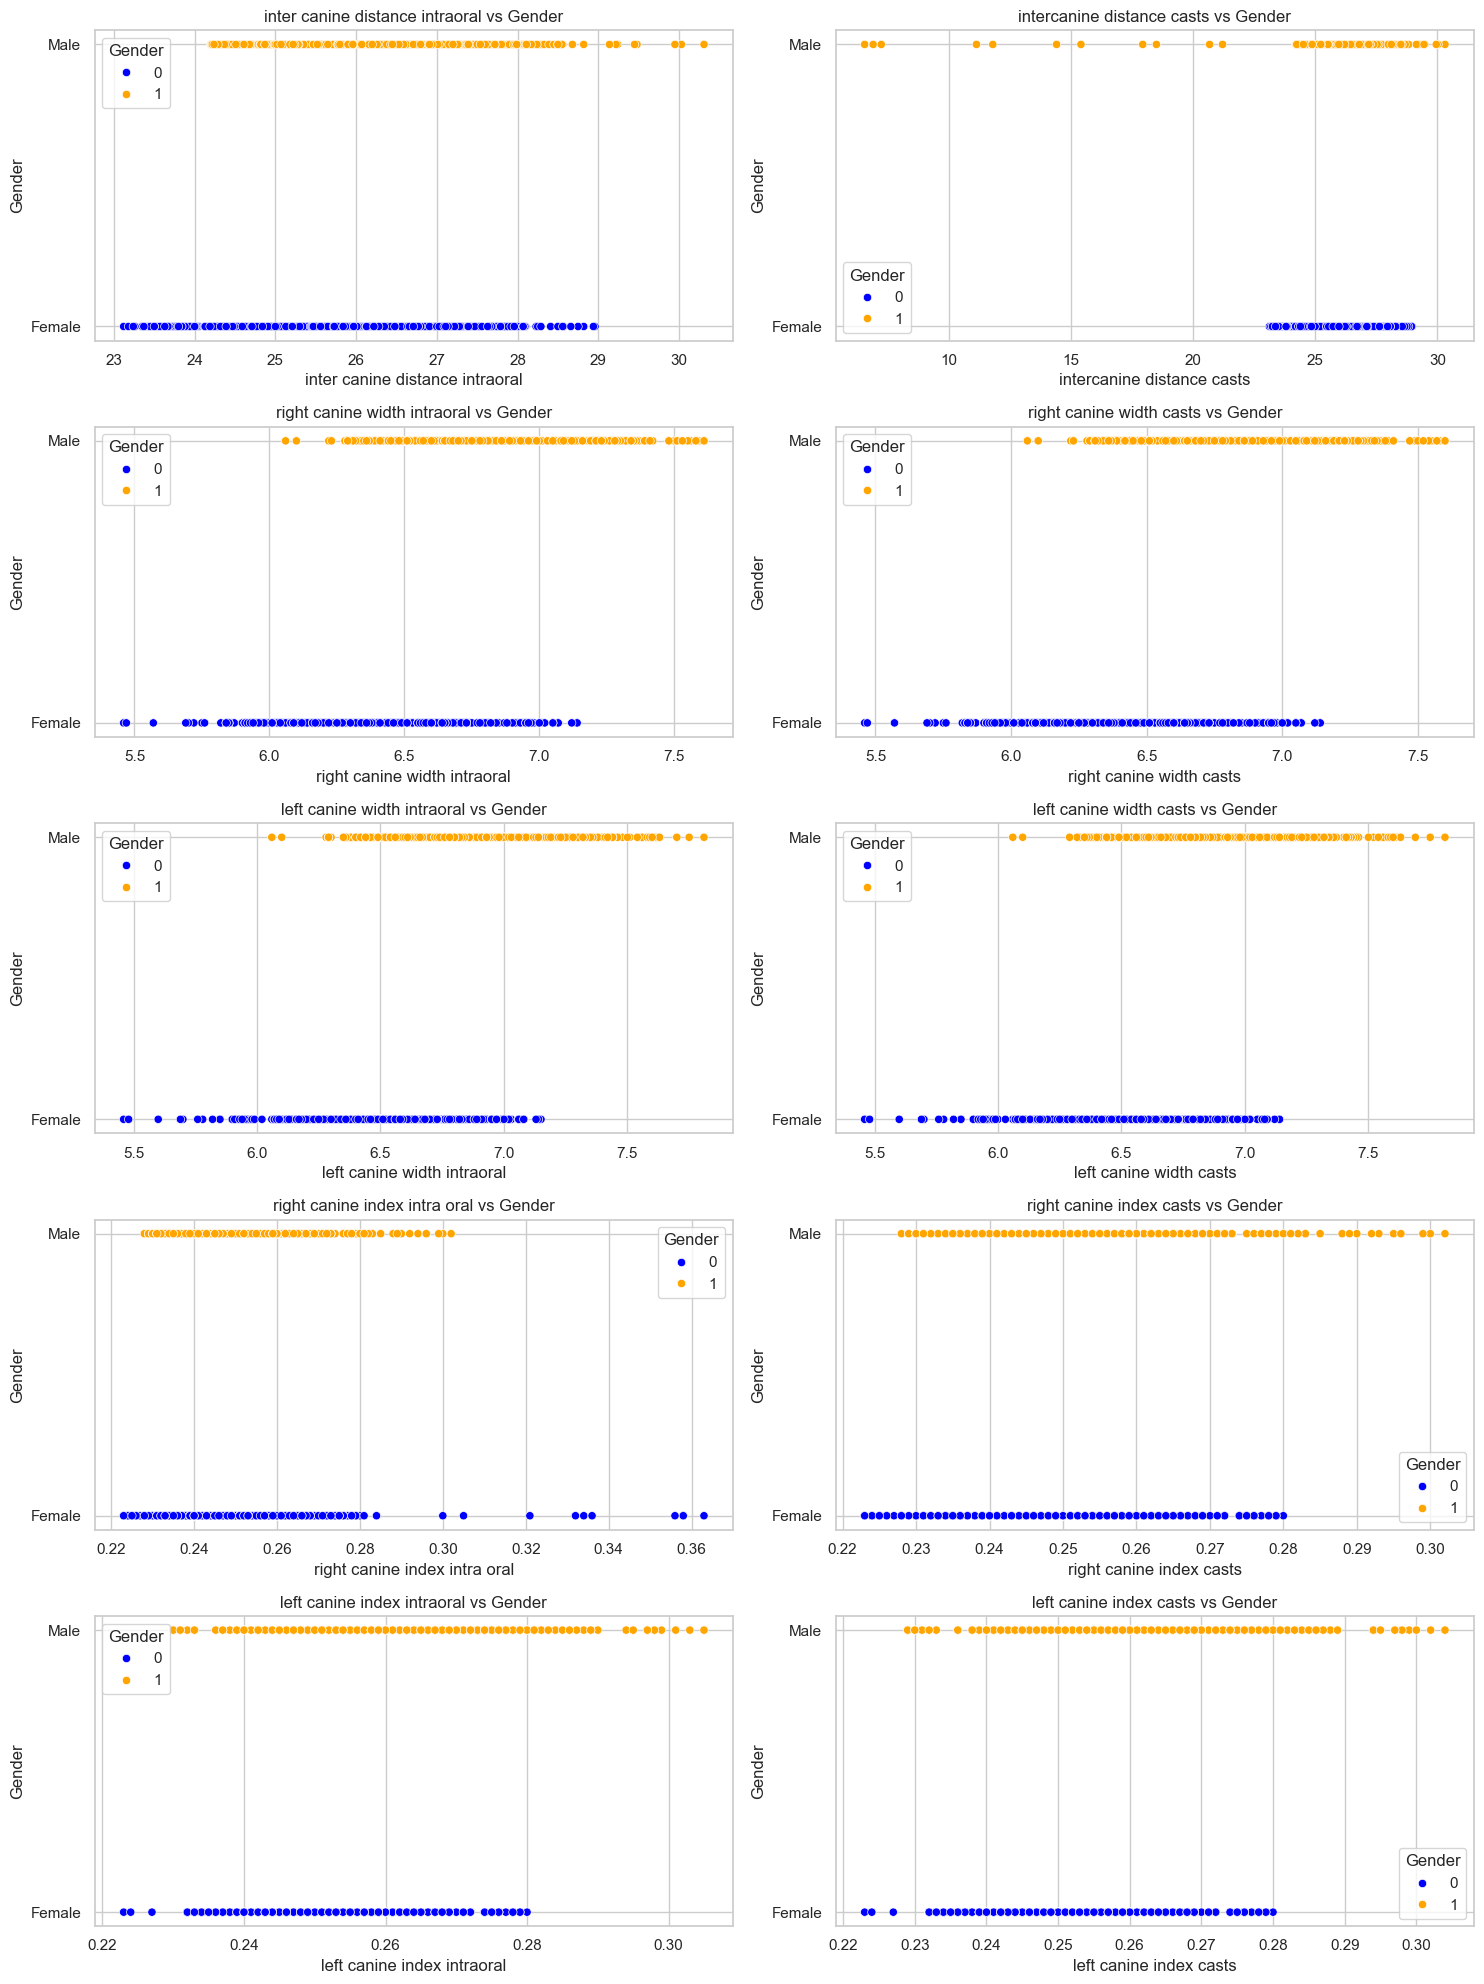

In [995]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = [
    'inter canine distance intraoral',
    'intercanine distance casts',
    'right canine width intraoral',
    'right canine width casts',
    'left canine width intraoral',
    'left canine width casts',
    'right canine index intra oral',
    'right canine index casts',
    'left canine index intraoral',
    'left canine index casts'
]

# Set the figure size
plt.figure(figsize=(15, 20))

# Create a scatter plot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(5, 2, i)  # Adjust subplot grid size (rows, columns)
    sns.scatterplot(x=feature, y='Gender', data=df, hue='Gender', palette={0: 'blue', 1: 'orange'})
    plt.title(f'{feature} vs Gender')
    plt.xlabel(feature)
    plt.ylabel('Gender')
    plt.yticks([0, 1], ['Female', 'Male'])  # Set y-axis ticks

plt.tight_layout()
plt.show()



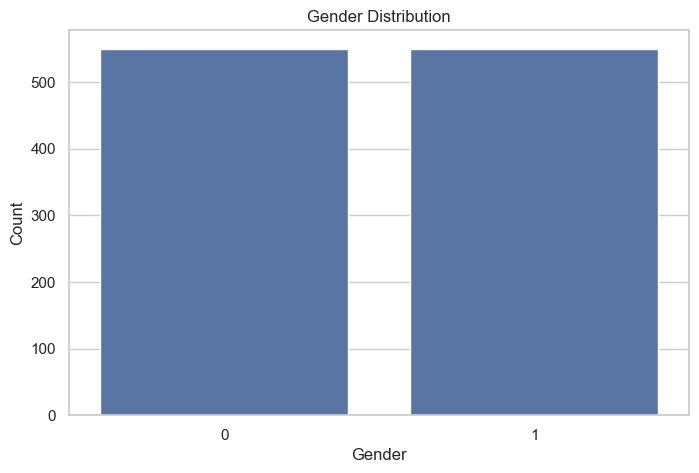

In [996]:
# Bar chart for Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


from the above we can see there is no class imbalance 

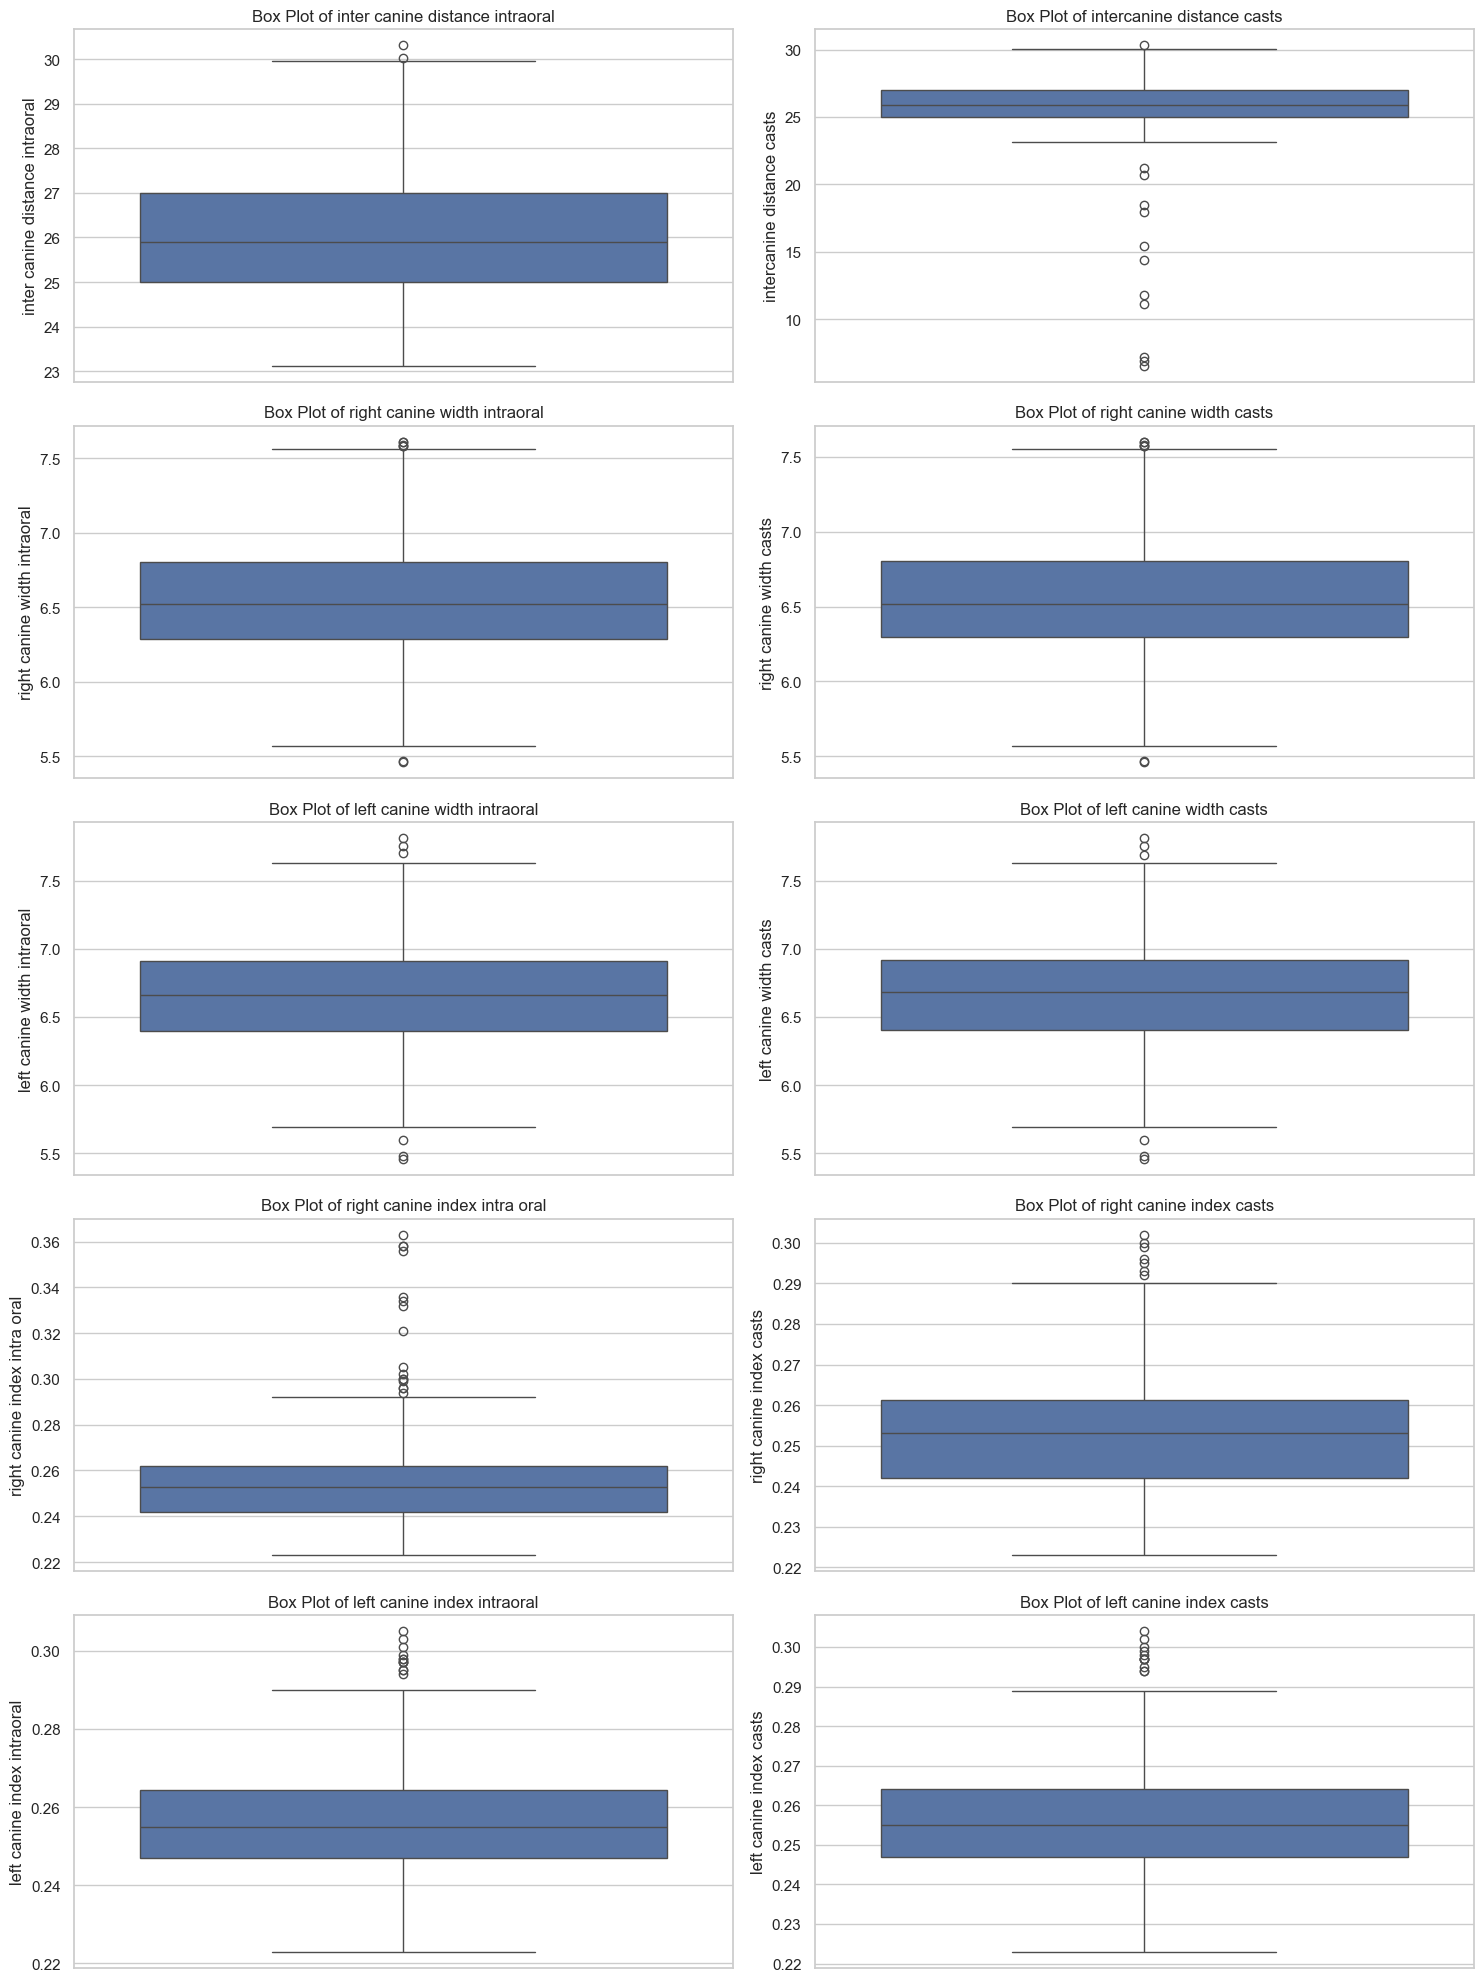

In [997]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = [
    'inter canine distance intraoral',
    'intercanine distance casts',
    'right canine width intraoral',
    'right canine width casts',
    'left canine width intraoral',
    'left canine width casts',
    'right canine index intra oral',
    'right canine index casts',
    'left canine index intraoral',
    'left canine index casts'
]

# Set the figure size
plt.figure(figsize=(15, 20))

# Create a box plot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(5, 2, i)  # Adjust subplot grid size (rows, columns)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel('')

plt.tight_layout()
plt.show()




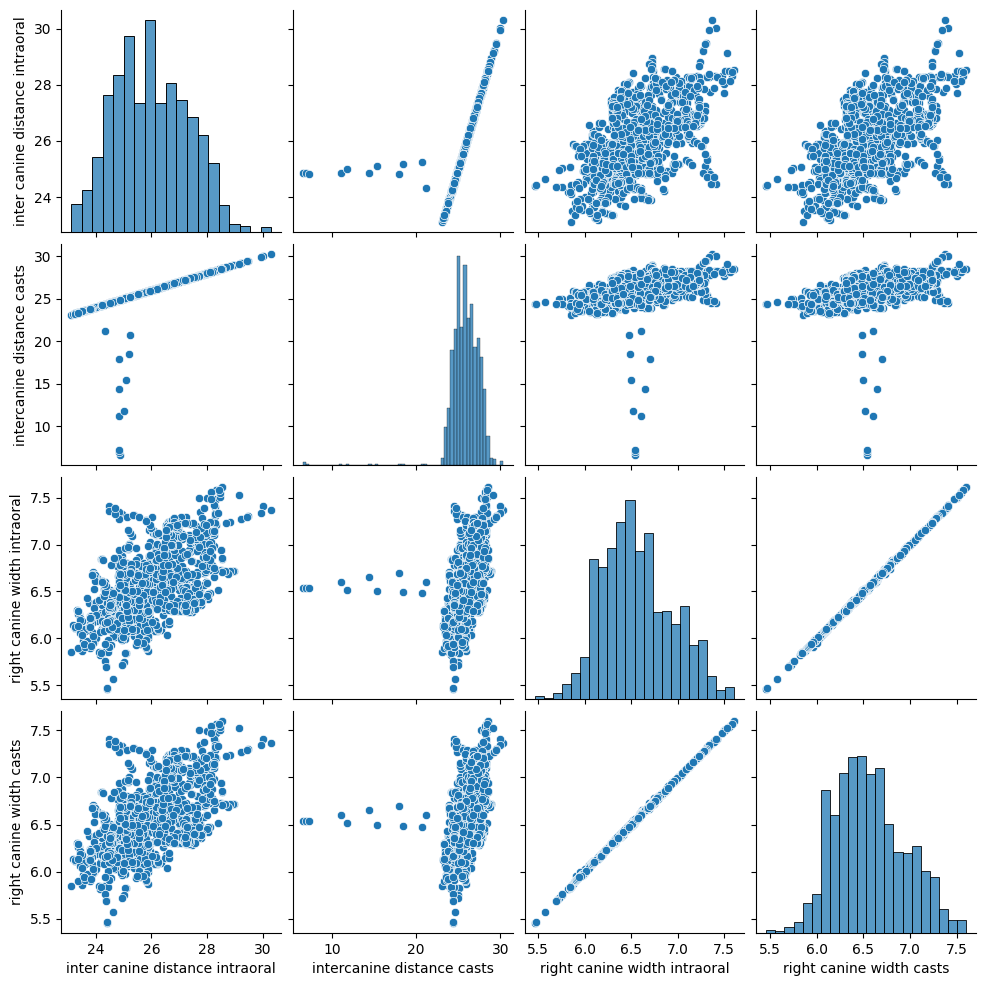

In [24]:
# Pair plot for selected columns
columns_to_plot = ['inter canine distance intraoral', 'intercanine distance casts', 'right canine width intraoral', 'right canine width casts']
sns.pairplot(df[columns_to_plot])
plt.show()


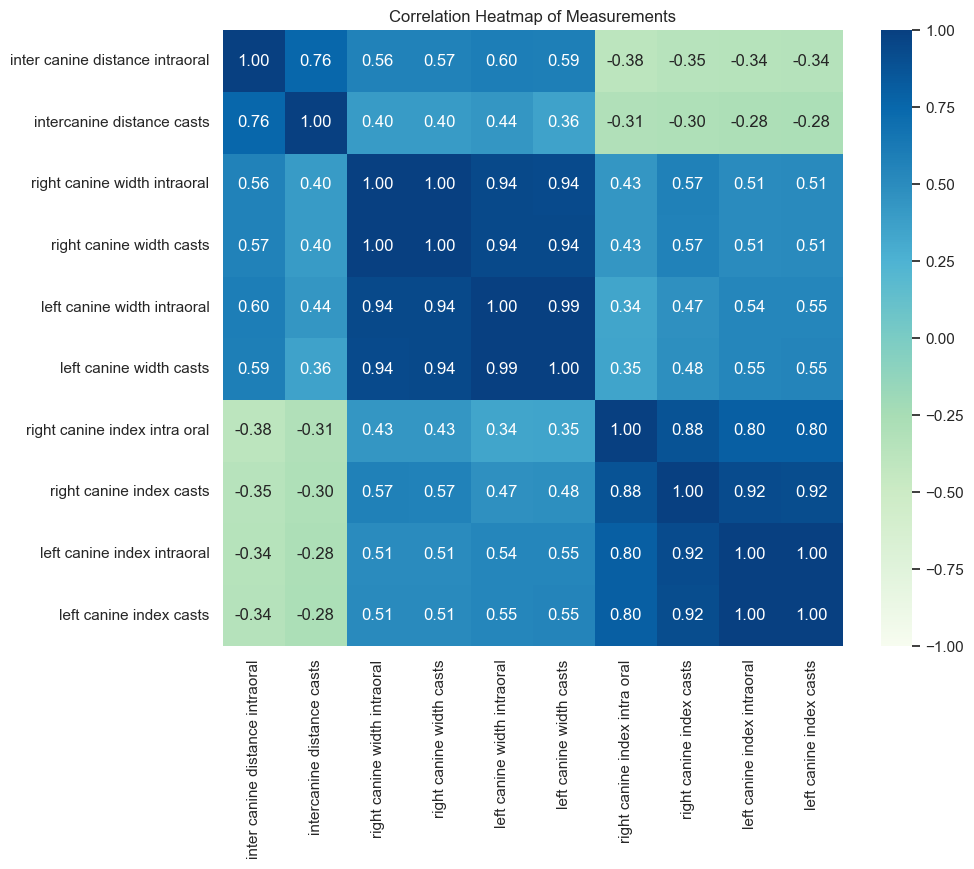

In [998]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns for correlation
columns_to_plot = ['inter canine distance intraoral', 'intercanine distance casts', 
                    'right canine width intraoral', 'right canine width casts', 
                    'left canine width intraoral', 'left canine width casts', 
                    'right canine index intra oral', 'right canine index casts', 
                    'left canine index intraoral', 'left canine index casts']

# Compute the correlation matrix
correlation_matrix = df[columns_to_plot].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Measurements')
plt.show()


# outlier detection using IsolationForest 

In [999]:
from sklearn.ensemble import IsolationForest

# Define the feature columns used for training
features = ['Age', 'inter canine distance intraoral', 'intercanine distance casts', 
             'right canine width intraoral', 'right canine width casts', 
             'left canine width intraoral', 'left canine width casts', 
             'right canine index intra oral', 'right canine index casts', 
             'left canine index intraoral', 'left canine index casts']

# Ensure df1 only contains these feature columns
df1_features = df1[features]

# Initialize and fit the Isolation Forest model
clf = IsolationForest(random_state=10, contamination=0.01)
clf.fit(df1_features)

# Predict outliers
df1['anomaly'] = clf.predict(df1_features)

# Compute anomaly scores
df1['scores'] = clf.decision_function(df1_features)

# Optional: Check results
print(df1[['anomaly', 'scores']].head())


   anomaly    scores
0        1  0.170845
1        1  0.207815
2        1  0.114704
3        1  0.175991
4        1  0.169883


In [1000]:

#Print the outlier data points
df1[df1['anomaly']==-1]

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts,scores,anomaly
45,25,24.39,24.39,5.46,5.46,5.46,5.46,0.223,0.223,0.223,0.223,-0.072973,-1
57,25,24.48,24.51,7.41,7.41,7.48,7.46,0.302,0.302,0.305,0.304,-0.050125,-1
550,25,24.63,24.63,5.57,5.57,5.60,5.60,0.225,0.225,0.227,0.227,-0.049307,-1
552,24,24.36,24.36,5.70,5.70,5.70,5.70,0.234,0.234,0.234,0.234,-0.010825,-1
559,25,24.42,24.42,5.47,5.47,5.48,5.48,0.223,0.223,0.224,0.224,-0.070612,-1
592,24,24.36,24.36,5.69,5.69,5.69,5.69,0.233,0.233,0.233,0.233,-0.013377,-1
613,25,24.48,24.50,7.36,7.36,7.43,7.41,0.300,0.300,0.303,0.302,-0.037696,-1
673,24,24.93,24.96,7.33,7.33,7.43,7.42,0.294,0.293,0.298,0.297,-0.015745,-1
686,25,24.83,24.86,7.35,7.35,7.44,7.43,0.296,0.295,0.299,0.299,-0.028223,-1
693,25,24.71,24.74,7.32,7.32,7.38,7.36,0.296,0.296,0.298,0.298,-0.016961,-1


# Using T-test and ANOVA test to see if outliers have any significance or not 

In [1001]:
import pandas as pd
from scipy import stats


# Define the outliers
outlier_indices = [5, 57, 550, 552, 559, 592, 613, 673, 686, 693, 706]

# Create DataFrames with and without outliers
df_with_outliers = df
df_without_outliers = df.drop(index=outlier_indices)

# Perform T-Tests
def perform_t_tests(df_with, df_without, features):
    results = {}
    for feature in features:
        # Extract feature data
        data_with = df_with[feature]
        data_without = df_without[feature]
        
        # Perform T-Test
        t_stat, p_val = stats.ttest_ind(data_with, data_without, equal_var=False)
        results[feature] = {'t_statistic': t_stat, 'p_value': p_val}
    
    return results

features = df.columns.difference(['Gender'])  # Assuming 'Gender' is the target variable
t_test_results = perform_t_tests(df_with_outliers, df_without_outliers, features)

print("T-Test Results:")
for feature, result in t_test_results.items():
    print(f"{feature}: t_statistic = {result['t_statistic']:.4f}, p_value = {result['p_value']:.4f}")

# Perform ANOVA
def perform_anova(df_with, df_without, features):
    results = {}
    for feature in features:
        # Extract feature data
        data_with = df_with[feature]
        data_without = df_without[feature]
        
        # Perform ANOVA
        f_stat, p_val = stats.f_oneway(data_with, data_without)
        results[feature] = {'f_statistic': f_stat, 'p_value': p_val}
    
    return results

anova_results = perform_anova(df_with_outliers, df_without_outliers, features)

print("ANOVA Results:")
for feature, result in anova_results.items():
    print(f"{feature}: f_statistic = {result['f_statistic']:.4f}, p_value = {result['p_value']:.4f}")

T-Test Results:
Age: t_statistic = 0.3525, p_value = 0.7245
inter canine distance intraoral: t_statistic = -0.2546, p_value = 0.7991
intercanine distance casts: t_statistic = -0.1635, p_value = 0.8702
left canine index casts: t_statistic = 0.2709, p_value = 0.7865
left canine index intraoral: t_statistic = 0.2768, p_value = 0.7820
left canine width casts: t_statistic = -0.0124, p_value = 0.9901
left canine width intraoral: t_statistic = -0.0038, p_value = 0.9970
right canine index casts: t_statistic = 0.3022, p_value = 0.7625
right canine index intra oral: t_statistic = 0.2432, p_value = 0.8079
right canine width casts: t_statistic = 0.0334, p_value = 0.9734
right canine width intraoral: t_statistic = 0.0342, p_value = 0.9727
ANOVA Results:
Age: f_statistic = 0.1243, p_value = 0.7245
inter canine distance intraoral: f_statistic = 0.0648, p_value = 0.7991
intercanine distance casts: f_statistic = 0.0267, p_value = 0.8702
left canine index casts: f_statistic = 0.0734, p_value = 0.7865
le

# Findings:

All features have p-values well above the 0.05 threshold, indicating that there is no statistically significant difference in the means of these features with and without outliers.
This means that, based on the T-Test, outliers do not have a significant effect on the mean values of these features.

All features have p-values well above the 0.05 threshold, indicating that there is no statistically significant difference in the variance of these features with and without outliers.
This means that, based on ANOVA, outliers do not significantly affect the variance of these features.

Based on the results outliers doesnt have any significant affect to keeping the outliers

# Feature Engineering 

# Combining columns based on the Pearson correlation coefficients from the heatmap above as they show the significant high correlation.


In [1002]:

# Combine the columns by taking the mean of the two
df['left_canine_width_combined'] = df[['left canine width intraoral', 'left canine width casts']].mean(axis=1)

# Drop the original columns if you no longer need them
df.drop(columns=['left canine width intraoral', 'left canine width casts'], inplace=True)


In [1003]:


# Combine the columns by averaging their values
df['right canine width combined'] = df[['right canine width intraoral', 'right canine width casts']].mean(axis=1)

# Optionally, you can drop the original columns if they are no longer needed
df.drop(columns=['right canine width intraoral', 'right canine width casts'], inplace=True)




In [1004]:


# Combine the columns by averaging their values
df['left canine index combined'] = df[['left canine index intraoral', 'left canine index casts']].mean(axis=1)

# Optionally, you can drop the original columns if they are no longer needed
df.drop(columns=['left canine index intraoral', 'left canine index casts'], inplace=True)



# Feature selection 

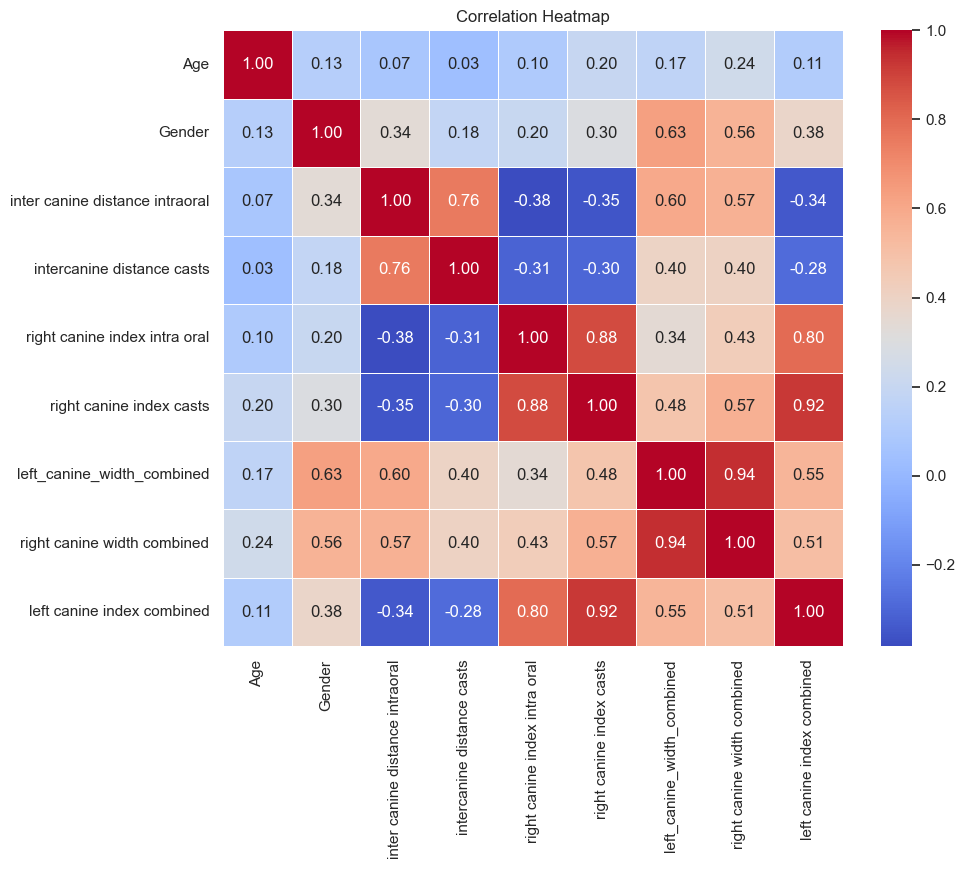

In [1005]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# ANOVA F-test

In [1006]:
from sklearn.feature_selection import f_classif
import pandas as pd



# Separate features and target
X = df.drop('Gender', axis=1)
y = df['Gender']

# Apply ANOVA F-test
f_values, p_values = f_classif(X, y)

# Create DataFrame for results
anova_results = pd.DataFrame({'Feature': X.columns, 'F Value': f_values, 'P Value': p_values})

# Sort the results by F Value in descending order
anova_results_sorted = anova_results.sort_values(by='F Value', ascending=False)

# Display the results
print(anova_results_sorted)


                           Feature     F Value        P Value
5       left_canine_width_combined  731.058330  8.088043e-124
6      right canine width combined  496.510445   4.811497e-91
7       left canine index combined  186.175327   2.847903e-39
1  inter canine distance intraoral  143.991797   2.923974e-31
4         right canine index casts  104.788429   1.493572e-23
3    right canine index intra oral   47.458899   9.442911e-12
2       intercanine distance casts   37.059398   1.581539e-09
0                              Age   18.856278   1.539729e-05


# Recursive Feature Elemination 

In [1007]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd



# Separate features and target
X = df.drop('Gender', axis=1)
y = df['Gender']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the model for RFE
model = RandomForestClassifier(random_state=42)

# Initialize RFE with the model
rfe = RFE(estimator=model, n_features_to_select=None)  # Set n_features_to_select to None to rank all features

# Fit RFE
rfe.fit(x_train, y_train)

# Get the ranking of features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_}).sort_values(by='Ranking')

# Print the ranking of features
print(feature_ranking)


                           Feature  Ranking
1  inter canine distance intraoral        1
5       left_canine_width_combined        1
6      right canine width combined        1
7       left canine index combined        1
2       intercanine distance casts        2
3    right canine index intra oral        3
4         right canine index casts        4
0                              Age        5


# Random forest classifier for feature elimination

                           Feature  Importance
5       left_canine_width_combined    0.271282
6      right canine width combined    0.168645
1  inter canine distance intraoral    0.135633
7       left canine index combined    0.110138
2       intercanine distance casts    0.105271
3    right canine index intra oral    0.078140
4         right canine index casts    0.069631
0                              Age    0.061258


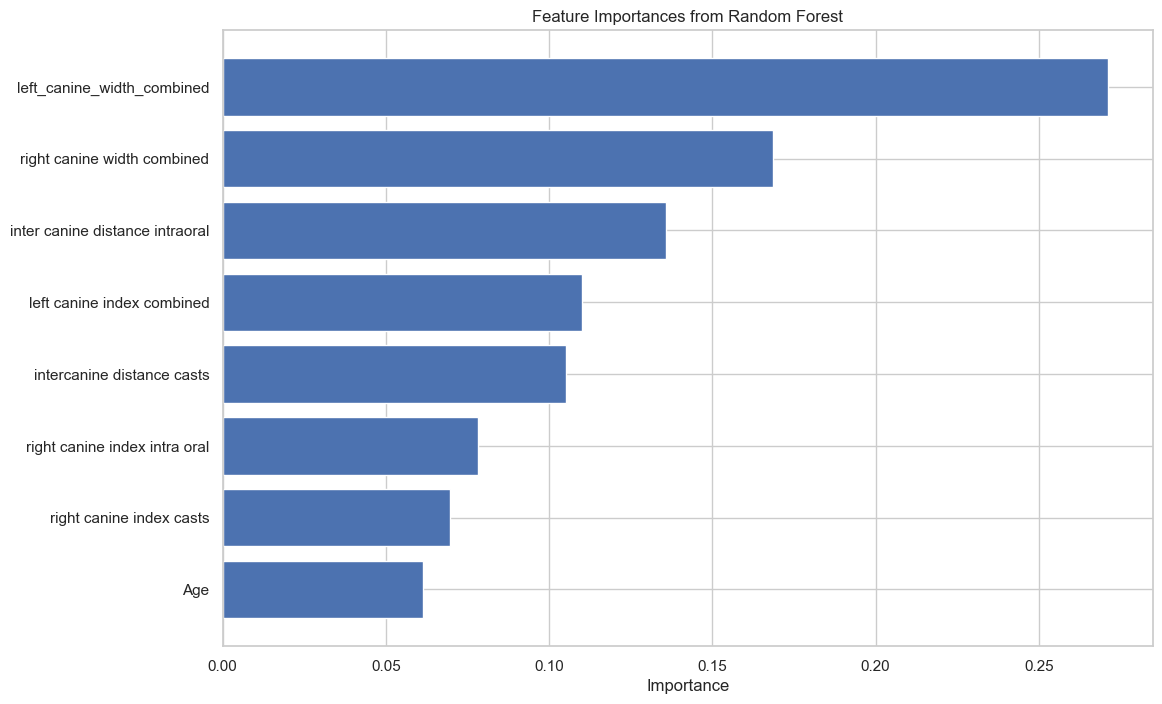

In [1008]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


X = df_cleaned.drop('Gender', axis=1)
y = df_cleaned['Gender']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(x_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()


# Keeping the features Age and Right Canine index
Based on the above ANOVA , REF and Random forest Age feature has the less value. But Age feature doesnt show strong correlation with the other features with respect to pearson correlation coefficients.

Similarly, Right Canine index casts also have low score or ranking with respect to REF and Random forest, but with ANOVA test it is showing the better value, so keeping the feature.

In [1009]:
import pandas as pd


# Separate the target variable 'class' into y
y = df['Gender']

X = df.drop(columns=['Gender'])


# Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model 1 Decision Tree

In [1010]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the Decision Tree Classifier with a max_depth parameter
max_depth_value = 5  # Example value; adjust as needed
clf = DecisionTreeClassifier(max_depth=max_depth_value, random_state=40)

# Train the classifier
clf.fit(x_train, y_train)

# Predict on the test set
y_pred = clf.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8500
Confusion Matrix:
[[93 17]
 [16 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.85      0.85      0.85       110

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



# Model 2 Logistic regression

In [1011]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=40, max_iter=1000)  # Increase max_iter if needed

# Train the model
log_reg.fit(x_train, y_train)

# Predict on the test set
y_pred1 = log_reg.predict(x_test)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred1)
conf_matrix1 = confusion_matrix(y_test, y_pred1)
class_report1 = classification_report(y_test, y_pred1)

# Print evaluation results
print(f'Accuracy: {accuracy1:.4f}')
print('Confusion Matrix:')
print(conf_matrix1)
print('Classification Report:')
print(class_report1)


Accuracy: 0.8091
Confusion Matrix:
[[87 23]
 [19 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       110
           1       0.80      0.83      0.81       110

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220



# Model 3 KNN

In [1012]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Initialize StandardScaler
scaler = StandardScaler()

# Scale features
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model initialization
knn = KNeighborsClassifier(n_neighbors=1)  # Example with k=1; adjust as needed

# Include Age column
X_with_age = X
x_train_with_age, x_test_with_age, y_train, y_test = train_test_split(X_with_age, y, test_size=0.2, random_state=42, stratify=y)
x_train_with_age_scaled = scaler.fit_transform(x_train_with_age)
x_test_with_age_scaled = scaler.transform(x_test_with_age)

# Cross-validation with Age column
cv_scores_with_age = cross_val_score(knn, x_train_with_age_scaled, y_train, cv=5, scoring='accuracy')

# Print cross-validation results with Age column
print(f'Cross-Validation Scores with Age Column: {cv_scores_with_age}')
print(f'Mean Accuracy with Age Column: {cv_scores_with_age.mean():.4f}')
print(f'Standard Deviation with Age Column: {cv_scores_with_age.std():.4f}')

# Train and evaluate on test set with Age column
knn.fit(x_train_with_age_scaled, y_train)
y_pred_with_age = knn.predict(x_test_with_age_scaled)

accuracy_with_age = accuracy_score(y_test, y_pred_with_age)
conf_matrix_with_age = confusion_matrix(y_test, y_pred_with_age)
class_report_with_age = classification_report(y_test, y_pred_with_age)

# Print evaluation results with Age column
print(f'Accuracy with Age Column: {accuracy_with_age:.4f}')
print('Confusion Matrix with Age Column:')
print(conf_matrix_with_age)
print('Classification Report with Age Column:')
print(class_report_with_age)

# Exclude Age column
X_without_age = X.drop('Age', axis=1)
x_train_without_age, x_test_without_age, y_train, y_test = train_test_split(X_without_age, y, test_size=0.2, random_state=42, stratify=y)
x_train_without_age_scaled = scaler.fit_transform(x_train_without_age)
x_test_without_age_scaled = scaler.transform(x_test_without_age)

# Cross-validation without Age column
cv_scores_without_age = cross_val_score(knn, x_train_without_age_scaled, y_train, cv=5, scoring='accuracy')

# Print cross-validation results without Age column
print(f'Cross-Validation Scores without Age Column: {cv_scores_without_age}')
print(f'Mean Accuracy without Age Column: {cv_scores_without_age.mean():.4f}')
print(f'Standard Deviation without Age Column: {cv_scores_without_age.std():.4f}')

# Train and evaluate on test set without Age column
knn.fit(x_train_without_age_scaled, y_train)
y_pred_without_age = knn.predict(x_test_without_age_scaled)

accuracy_without_age = accuracy_score(y_test, y_pred_without_age)
conf_matrix_without_age = confusion_matrix(y_test, y_pred_without_age)
class_report_without_age = classification_report(y_test, y_pred_without_age)

# Print evaluation results without Age column
print(f'Accuracy without Age Column: {accuracy_without_age:.4f}')
print('Confusion Matrix without Age Column:')
print(conf_matrix_without_age)
print('Classification Report without Age Column:')
print(class_report_without_age)




Cross-Validation Scores with Age Column: [0.89772727 0.93181818 0.91477273 0.92045455 0.89772727]
Mean Accuracy with Age Column: 0.9125
Standard Deviation with Age Column: 0.0133
Accuracy with Age Column: 0.9364
Confusion Matrix with Age Column:
[[103   7]
 [  7 103]]
Classification Report with Age Column:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       110
           1       0.94      0.94      0.94       110

    accuracy                           0.94       220
   macro avg       0.94      0.94      0.94       220
weighted avg       0.94      0.94      0.94       220

Cross-Validation Scores without Age Column: [0.84659091 0.875      0.85795455 0.84659091 0.875     ]
Mean Accuracy without Age Column: 0.8602
Standard Deviation without Age Column: 0.0128
Accuracy without Age Column: 0.8591
Confusion Matrix without Age Column:
[[96 14]
 [17 93]]
Classification Report without Age Column:
              precision    recall  f1-score

# Model 4 Naive Bayes 

In [1014]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes model
nb = GaussianNB()

# Train the model
nb.fit(x_train, y_train)

# Predict on the test set
y_pred3 = nb.predict(x_test)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred3)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
class_report3 = classification_report(y_test, y_pred3)

# Print evaluation results
print(f'Accuracy: {accuracy3:.4f}')
print('Confusion Matrix:')
print(conf_matrix3)
print('Classification Report:')
print(class_report3)


Accuracy: 0.7818
Confusion Matrix:
[[87 23]
 [25 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       110
           1       0.79      0.77      0.78       110

    accuracy                           0.78       220
   macro avg       0.78      0.78      0.78       220
weighted avg       0.78      0.78      0.78       220



# Model 5 SVM

In [1015]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the Support Vector Machine model with specified parameters
svm = SVC(C=50, gamma='scale', kernel='rbf', random_state=40)  # Use your best parameters

# Train the model
svm.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm.predict(x_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)  # Use y_pred_svm for accuracy
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print evaluation results
print(f'Accuracy: {accuracy_svm:.4f}')
print('Confusion Matrix:')
print(conf_matrix_svm)
print('Classification Report:')
print(class_report_svm)



Accuracy: 0.9182
Confusion Matrix:
[[103   7]
 [ 11  99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       110
           1       0.93      0.90      0.92       110

    accuracy                           0.92       220
   macro avg       0.92      0.92      0.92       220
weighted avg       0.92      0.92      0.92       220



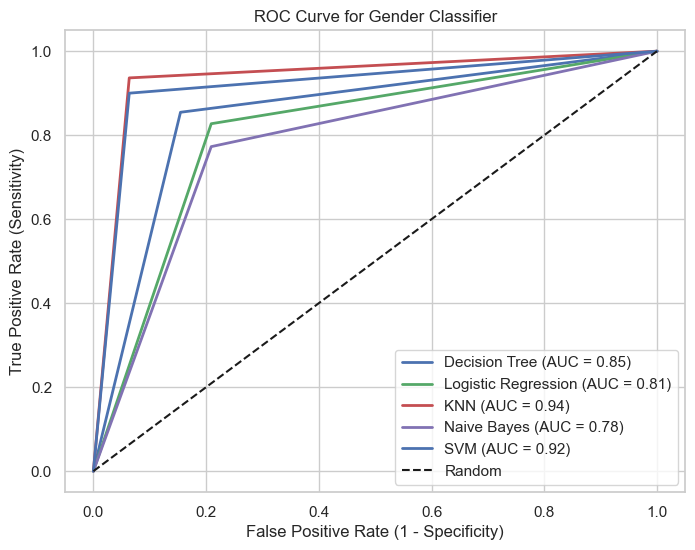

In [1017]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for each model
fpr1, tpr1, _ = roc_curve(y_test, y_pred)          # Decision Tree
fpr2, tpr2, _ = roc_curve(y_test, y_pred1)         # Logistic Regression
fpr3, tpr3, _ = roc_curve(y_test, y_pred_with_age) # KNN
fpr4, tpr4, _ = roc_curve(y_test, y_pred3)         # Naive Bayes
fpr5, tpr5, _ = roc_curve(y_test, y_pred_svm)      # SVM

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
roc_auc5 = auc(fpr5, tpr5)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, linewidth=2, label=f'Decision Tree (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, linewidth=2, color='g', label=f'Logistic Regression (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, linewidth=2, color='r', label=f'KNN (AUC = {roc_auc3:.2f})')
plt.plot(fpr4, tpr4, linewidth=2, color='m', label=f'Naive Bayes (AUC = {roc_auc4:.2f})')
plt.plot(fpr5, tpr5, linewidth=2, color='b', label=f'SVM (AUC = {roc_auc5:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Gender Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.show()


In [980]:
import pickle
pickle.dump(knn, open('Finalizedk.pkl', 'wb'))


In [1020]:
%%writefile appk.py
import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

# Load the model
model = pickle.load(open('Finalizedk.pkl', 'rb'))

# Initialize StandardScaler
scaler = StandardScaler()

# Define Streamlit widgets for user input
st.title('K-Nearest Neighbors Model Prediction')

# Input fields with range constraints
inter_canine_distance_intraoral = st.number_input(
    'Inter Canine Distance Intraoral (mm)', 
    min_value=20.00, 
    max_value=40.00, 
    value=20.00
)
intercanine_distance_casts = st.number_input(
    'Intercanine Distance Casts (mm)', 
    min_value=6.00, 
    max_value=30.31, 
    value=6.00
)
right_canine_width_casts = st.number_input(
    'Right Canine Width Casts (mm)', 
    min_value=5.00, 
    max_value=11.00, 
    value=5.00
)
left_canine_width_casts = st.number_input(
    'Left Canine Width Casts (mm)', 
    min_value=5.00, 
    max_value=11.00, 
    value=5.00
)
right_canine_index_intra_oral = st.number_input(
    'Right Canine Index Intra Oral', 
    min_value=0.2, 
    max_value=0.4, 
    value=0.2
)
right_canine_index_casts = st.number_input(
    'Right Canine Index Casts', 
    min_value=0.2, 
    max_value=0.4, 
    value=0.2
)
left_canine_index_casts = st.number_input(
    'Left Canine Index Casts', 
    min_value=0.2, 
    max_value=0.4, 
    value=0.2
)

# Create a DataFrame for the input data
input_data = pd.DataFrame({
    'inter canine distance intraoral': [inter_canine_distance_intraoral],
    'intercanine distance casts': [intercanine_distance_casts],
    'right canine width casts': [right_canine_width_casts],
    'left canine width casts': [left_canine_width_casts],
    'right canine index intra oral': [right_canine_index_intra_oral],
    'right canine index casts': [right_canine_index_casts],
    'left canine index casts': [left_canine_index_casts]
})

# Display the entered values and their ranges
st.write('**Entered Values:**')
st.write(input_data)

# Display expected ranges
st.write('**Expected Ranges:**')
st.write('Inter Canine Distance Intraoral: 20 mm to 40 mm')
st.write('Intercanine Distance Casts: 6.00 mm to 30.31 mm')
st.write('Right Canine Width Casts: 5.00 mm to 11.00 mm')
st.write('Left Canine Width Casts: 5.00 mm to 11.00 mm')
st.write('Right Canine Index Intra Oral: 0.2 to 0.4')
st.write('Right Canine Index Casts: 0.2 to 0.4')
st.write('Left Canine Index Casts: 0.2 to 0.4')

# Predict button
if st.button('Predict'):
    # Scale the input data
    input_data_scaled = scaler.fit_transform(input_data)
    
    # Predict using the loaded model
    prediction = model.predict(input_data_scaled)
    prediction_proba = model.predict_proba(input_data_scaled)
    
    # Show prediction results
    if prediction[0] == 0:
        st.write('**Prediction:** Female')
    else:
        st.write('**Prediction:** Male')
    st.write('**Prediction Probability:**', prediction_proba[0])






Overwriting appk.py


In [1021]:
! streamlit run appk.py

^C
